In [1]:
import numpy as np
import sys,os
import caffe
import glob
import json
import matplotlib.pyplot as plt
%matplotlib inline

IMG_DIR = '../images'
IMG_PATH = glob.glob(os.path.join(IMG_DIR,'*.jpg'))

net_file='deploy.prototxt'
caffe_model='ILGnet-AVA2.caffemodel'
mean_file='mean/AVA2_mean.npy'

#if you have no GPUs,set mode cpu
caffe.set_mode_cpu()
net = caffe.Net(net_file, caffe_model, caffe.TEST)
transformer = caffe.io.Transformer({'data': net.blobs['data'].data.shape})
transformer.set_transpose('data', (2,0,1))
transformer.set_mean('data', np.load(mean_file).mean(1).mean(1))
transformer.set_raw_scale('data', 255)
transformer.set_channel_swap('data', (2,1,0))

In [9]:
entry = {}
for img_path in IMG_PATH:
    img = caffe.io.load_image(img_path)
    net.blobs['data'].data[...] = transformer.preprocess('data',img)
    out = net.forward()
    entry[img_path] = round(out["loss1/loss"][0][1], 4)

In [10]:
entry

{'../images/bad_01.jpg': 0.0742,
 '../images/bad_02.jpg': 0.2581,
 '../images/bad_03.jpg': 0.0001,
 '../images/bad_04.jpg': 0.9496,
 '../images/bad_05.jpg': 0.7239,
 '../images/bad_06.jpg': 0.8574,
 '../images/good_01.jpg': 0.3463,
 '../images/good_02.jpg': 0.832,
 '../images/good_03.jpg': 0.9839,
 '../images/good_04.jpg': 0.9891,
 '../images/good_05.jpg': 0.9743,
 '../images/good_06.jpg': 0.9671}

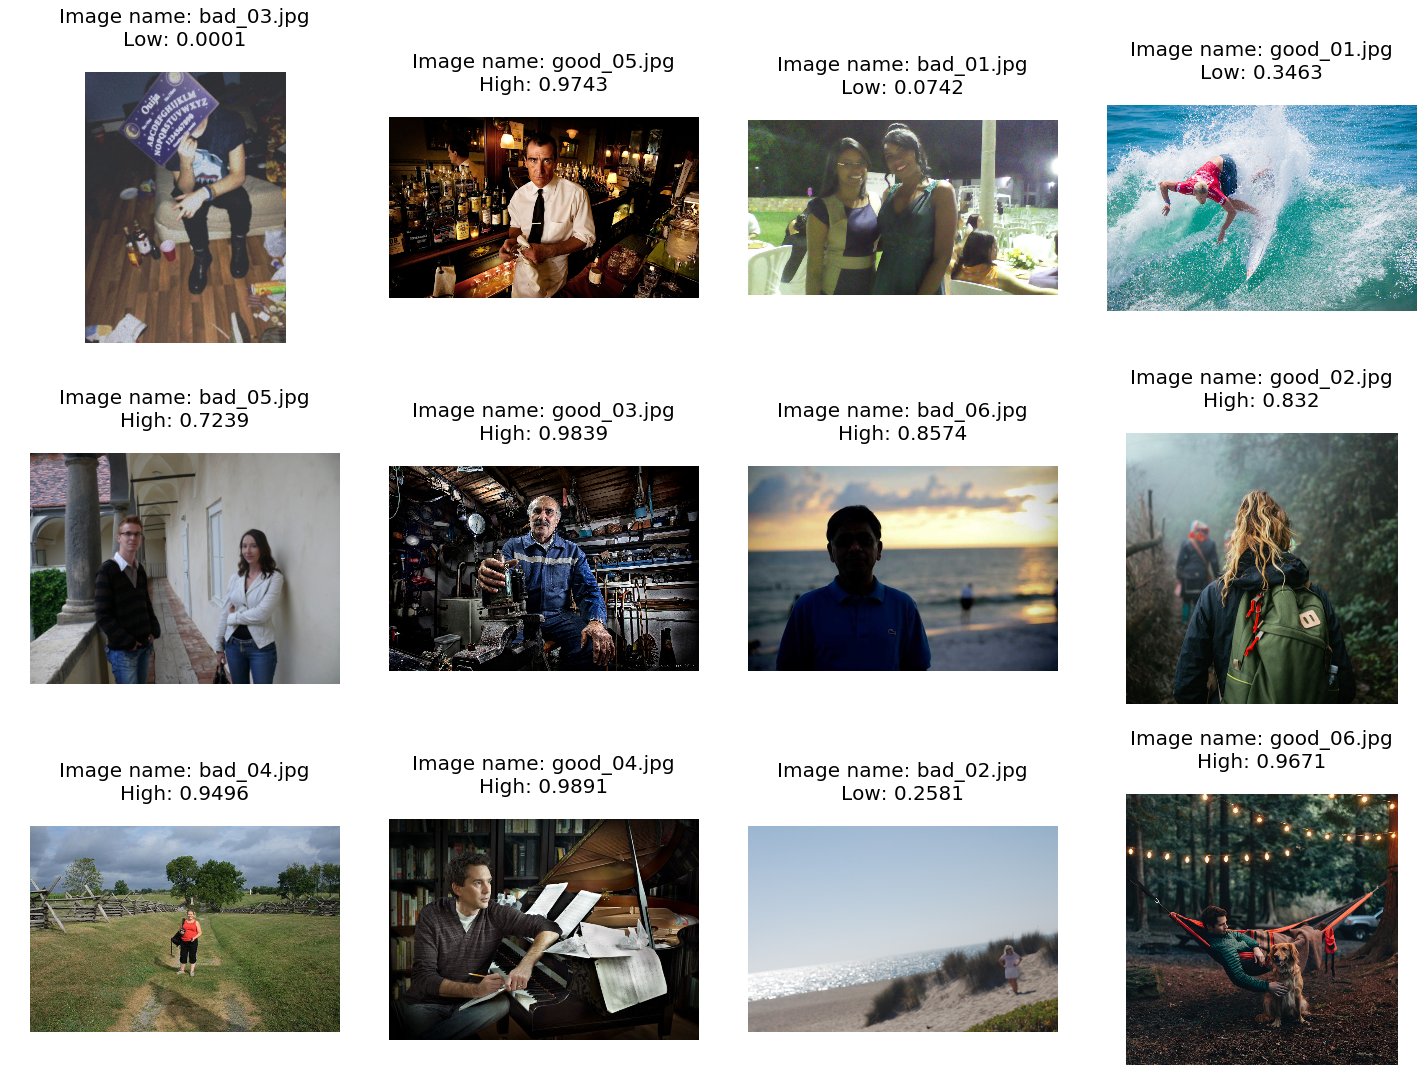

In [20]:
fig = plt.figure(figsize=(20, 20))
for i, obj in enumerate(entry):
    img_path, score = obj, entry[obj]
    img_name = os.path.basename(img_path)
    quality = 'Low'
    if(score>0.5):
        quality = 'High'
    _=plt.subplot(4, 4, 1+i)
    _=plt.imshow(plt.imread(img_path))
    _=plt.title('Image name: '+img_name+'\n'+quality+': '+str(score)+'\n', size=20)
    _=plt.axis('off')
plt.tight_layout()
plt.show()